In [1]:
# libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings(action='ignore')

data_path = '../../../Data/future_sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [2]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        percent_mem_change = 100 * (start_mem - end_mem) / start_mem
        print(f"The percent memory change is: {percent_mem_change}")
    
    return df

all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

The percent memory change is: 54.16661592897757
The percent memory change is: 38.46153846153846
The percent memory change is: 54.153232170638766
The percent memory change is: 39.83739837398374
The percent memory change is: 70.83151459696413


<Axes: >

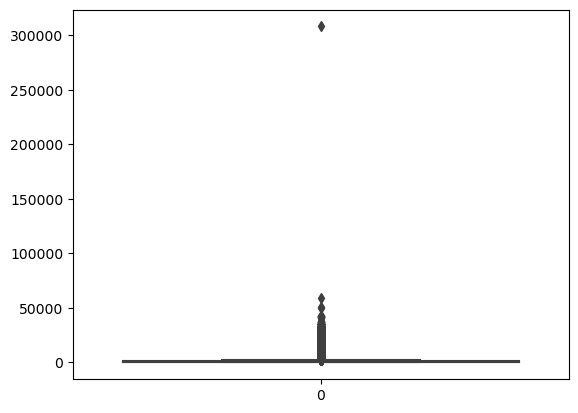

In [3]:
sns.boxplot(sales_train['item_price'])

<Axes: >

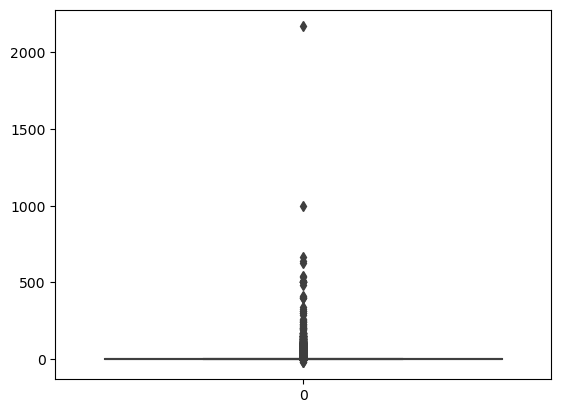

In [4]:
sns.boxplot(sales_train['item_cnt_day'])

In [5]:
# This removes outliers in the data. 
sales_train = sales_train.loc[(sales_train['item_price'] > 0) & (sales_train['item_price'] < 100000)]
sales_train = sales_train.loc[(sales_train['item_cnt_day'] > 0) & (sales_train['item_cnt_day'] < 900)]

In [6]:
shops["shop_first_name"] = shops["shop_name"].apply(lambda x: x.split()[0])

In [31]:
shops["shop_first_name"].unique()

array([29,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30])

In [8]:
shops.loc[shops["shop_first_name"] =='!Якутск', "shop_first_name"] = 'Якутск'

In [9]:
# Changes string variables with numeric type. 
label_encoder = LabelEncoder()
shops["shop_first_name"] = label_encoder.fit_transform(shops["shop_first_name"])

In [33]:
shops = shops.drop("shop_name", axis=1)

In [35]:
shops.head()

,shop_id,shop_first_name
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [37]:
items = items.drop(["item_name"], axis=1)

In [45]:
items["aggregate_col"] = sales_train.groupby("item_id").agg({"date_block_num": 'min'})["date_block_num"]
items.head()

,item_id,item_category_id,aggregate_col
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0
